# 2,0 Mode analysis with one waveform

In [1]:
from nrutils import scsearch, gwylm, alert
import numpy as np
import os, shutil, sys

import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')


import multiprocessing as mp

In [2]:
#Record initial stdout to switch on and off the verbose output of functions
old_stdout = sys.stdout
py3 = sys.version_info[0] > 2 #creates boolean value for test that Python major version > 2

In [3]:
# Disable Print
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore Print
def enablePrint():
    sys.stdout = old_stdout

# Strain and Psi4 plots with Cleaning

In [4]:
#Strain Computed using FT (FFI method), Psi4 loaded from Ylm_decomp simulation files. 

def gatech_psi4plots(y):
    
    psitime_20, re_20, im_20 = y.lm[2,0]['psi4'].wfarr.T
    psitime_21, re_21, im_21 = y.lm[2,1]['psi4'].wfarr.T
    psitime_22, re_22, im_22 = y.lm[2,2]['psi4'].wfarr.T
    
    psiamp_20 = np.sqrt(re_20**2. + im_20**2)
    psiamp_21 = np.sqrt(re_21**2. + im_21**2)
    psiamp_22 = np.sqrt(re_22**2. + im_22**2)

    tmax = psitime_22[psiamp_22==np.amax(psiamp_22)]
    
    plt.figure(figsize=(10,8))
    ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)
    ax1.plot(psitime_20, psiamp_20,'k--', lw=1)
    ax1.plot(psitime_20, re_20, 'b', lw=1)
    
    ax2 = plt.subplot2grid((2,2), (1,0))
    ax2.plot(psitime_21, psiamp_21,'k--', lw=1)
    ax2.plot(psitime_21, re_21,'r')
    
    ax3 = plt.subplot2grid((2,2), (1,1))
    ax3.plot(psitime_22, psiamp_22,'k--', lw=2)
    ax3.plot(psitime_22, re_22, 'g')
    #ax3.plot(t20, im20, 'g')
    
    ax1.set_ylabel('Psi4 (2,0)')
    ax2.set_ylabel('Psi4 (2,1)')
    ax3.set_ylabel('Psi4 (2,2)')
    
    ax1.set_xlabel('Time')
    ax2.set_xlabel('Time')
    ax3.set_xlabel('Time')
    
    ax1.set_xlim(tmax-200, tmax+200)
    ax2.set_xlim(tmax-200, tmax+100)
    ax3.set_xlim(tmax-200, tmax+100)
    plt.tight_layout()
    plt.show()
    plt.close()



In [5]:
def gatech_strainplots(y):

    time_20, hp_20, hx_20 = y.lm[2,0]['strain'].wfarr.T
    time_21, hp_21, hx_21 = y.lm[2,1]['strain'].wfarr.T
    time_22, hp_22, hx_22 = y.lm[2,2]['strain'].wfarr.T

    amp_20 = np.sqrt(hp_20**2. + hx_20**2)
    amp_21 = np.sqrt(hp_21**2. + hx_21**2)
    amp_22 = np.sqrt(hp_22**2. + hx_22**2)

    tmax = time_22[amp_22==np.amax(amp_22)]
    plt.figure(figsize=(10,8))
    ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)
    ax1.plot(time_20,amp_20,'k--', lw=1)
    ax1.plot(time_20, hp_20, 'b', lw=1)
    
    ax2 = plt.subplot2grid((2,2), (1,0))
    ax2.plot(time_21, amp_21,'k--', lw=1)
    ax2.plot(time_21, hp_21,'r')
    
    ax3 = plt.subplot2grid((2,2), (1,1))
    ax3.plot(time_22, amp_22,'k--', lw=2)
    ax3.plot(time_22, hp_22, 'g')
    #ax3.plot(t20, im20, 'g')
    
    ax1.set_ylabel('Strain (2,0)')
    ax2.set_ylabel('Strain (2,1)')
    ax3.set_ylabel('Strain (2,2)')
    
    ax1.set_xlabel('Time')
    ax2.set_xlabel('Time')
    ax3.set_xlabel('Time')
    
    ax1.set_xlim(tmax-200, tmax+200)
    ax2.set_xlim(tmax-200, tmax+100)
    ax3.set_xlim(tmax-200, tmax+100)
    plt.tight_layout()
    plt.show()
    plt.close()




In [6]:
def strain_psi4_compare(y):
   
    time_20, hp_20, hx_20 = y.lm[2,0]['strain'].wfarr.T
    time_21, hp_21, hx_21 = y.lm[2,1]['strain'].wfarr.T
    time_22, hp_22, hx_22 = y.lm[2,2]['strain'].wfarr.T

    amp_20 = np.sqrt(hp_20**2. + hx_20**2)
    amp_21 = np.sqrt(hp_21**2. + hx_21**2)
    amp_22 = np.sqrt(hp_22**2. + hx_22**2)

    
    psitime_20, re_20, im_20 = y.lm[2,0]['psi4'].wfarr.T
    psitime_21, re_21, im_21 = y.lm[2,1]['psi4'].wfarr.T
    psitime_22, re_22, im_22 = y.lm[2,2]['psi4'].wfarr.T
    
    psiamp_20 = np.sqrt(re_20**2. + im_20**2)
    psiamp_21 = np.sqrt(re_21**2. + im_21**2)
    psiamp_22 = np.sqrt(re_22**2. + im_22**2)
    
    tmax = time_22[amp_22==np.amax(amp_22)]
    
    plt.figure(figsize=(15,10))
    ax1 = plt.subplot2grid((3,2), (0,0))
    ax1.plot(psitime_20, psiamp_20,'k--', lw=1)
    ax1.plot(psitime_20, re_20, 'b', lw=1)
    
    ax3 = plt.subplot2grid((3,2), (1,0))
    ax3.plot(psitime_21, psiamp_21,'k--', lw=1)
    ax3.plot(psitime_21, re_21,'r')
    
    ax5 = plt.subplot2grid((3,2), (2,0))
    ax5.plot(psitime_22, psiamp_22,'k--', lw=1)
    ax5.plot(psitime_22, re_22, 'g')
    #ax3.plot(t20, im20, 'g')
    
    ax2 = plt.subplot2grid((3,2), (0,1))
    ax2.plot(time_20, amp_20,'k--', lw=1)
    ax2.plot(time_20, hp_20, 'b', lw=1)
    
    ax4 = plt.subplot2grid((3,2), (1,1))
    ax4.plot(time_21, amp_21,'k--', lw=1)
    ax4.plot(time_21, hp_21,'r')
    
    ax6 = plt.subplot2grid((3,2), (2,1))
    ax6.plot(time_22, amp_22,'k--', lw=1)
    ax6.plot(time_22, hp_22, 'g')
    #ax3.plot(t20, im20, 'g')
    
    
    ax1.set_ylabel('Psi4 (2,0)')
    ax3.set_ylabel('Psi4 (2,1)')
    ax5.set_ylabel('Psi4 (2,2)')
    ax2.set_ylabel('Strain (2,0)')
    ax4.set_ylabel('Strain (2,1)')
    ax6.set_ylabel('Strain (2,2)')
    
    
    ax1.set_xlabel('Time')
    ax3.set_xlabel('Time')
    ax5.set_xlabel('Time')
    ax2.set_xlabel('Time')
    ax4.set_xlabel('Time')
    ax6.set_xlabel('Time')
    
    ax1.set_xlim(tmax-200, tmax+200)
    ax2.set_xlim(tmax-200, tmax+100)
    ax3.set_xlim(tmax-200, tmax+100)
    ax4.set_xlim(tmax-200, tmax+200)
    ax5.set_xlim(tmax-200, tmax+100)
    ax6.set_xlim(tmax-200, tmax+100)
    plt.tight_layout()
    plt.show()
    plt.close()


In [7]:

sim = scsearch(keyword="D11_q1.00_a0.0_m200", verbose=True,institute='gt')[0]
simdir = sim.simdir()
lm = []
lmax=2
for l in range(2,lmax+1):
    for m in range(0,l+1):
        lm.append((l,m))
    
#Costruct the Strain bundle
blockPrint()
y = gwylm(sim, lm=lm, clean=True);    #'clean=true' windows (crops) the junk radiation and ringdown. Cropping based on initial low frequency
enablePrint()



(scsearch)>> Found institute (='gt') keyword.
(scsearch)>> Found keyword (='D11_q1.00_a0.0_m200') keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][bradwr] HR-series: ns-q1.00	(D11_q1.00_a0.0_m200)

(validate!)>> Multiple catalog directories found. We will scan through the related list, and then store first the catalog_dir that the OS can find.
(validate!)>> Selecting "/nethome/numrel/datafiles/Waveforms/"
/nethome/numrel/datafiles/Waveforms/HR-series/q1/D11_q1.00_a0.0_m200/


# Time Domain Plots
Below are time domain plots of Psi4 and Strain for (2,0) mode. Uncomment the plot lines to see 2,1 and 2,2 mode plots. I am confused about the oscillations of Psi4 amplitude and not sure if that is effect of numerical errors or actual waveform. Is there a way to check this apart from comparing this with SXS?

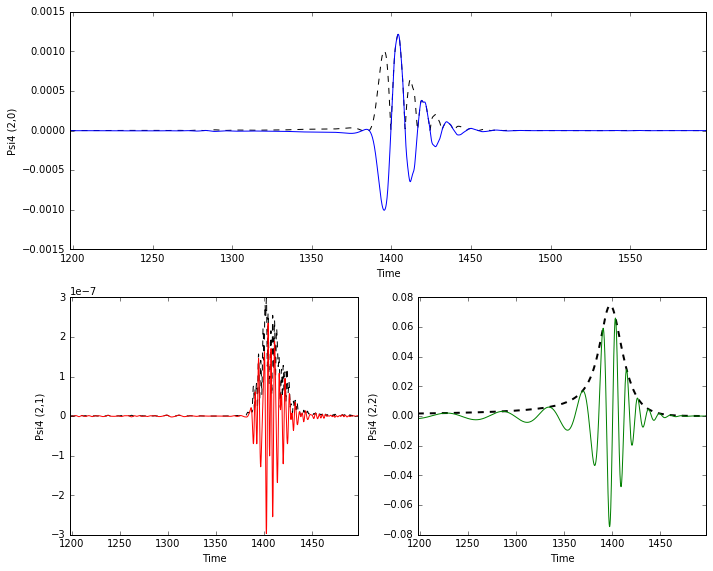

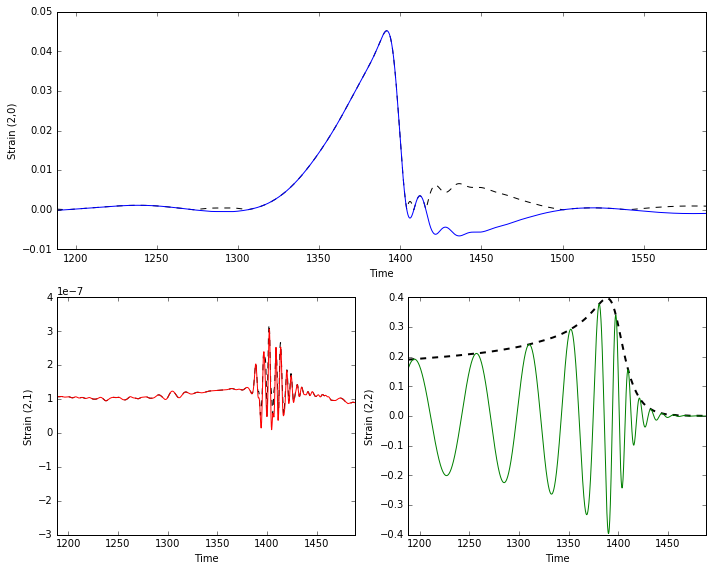

In [8]:
gatech_psi4plots(y);
gatech_strainplots(y);



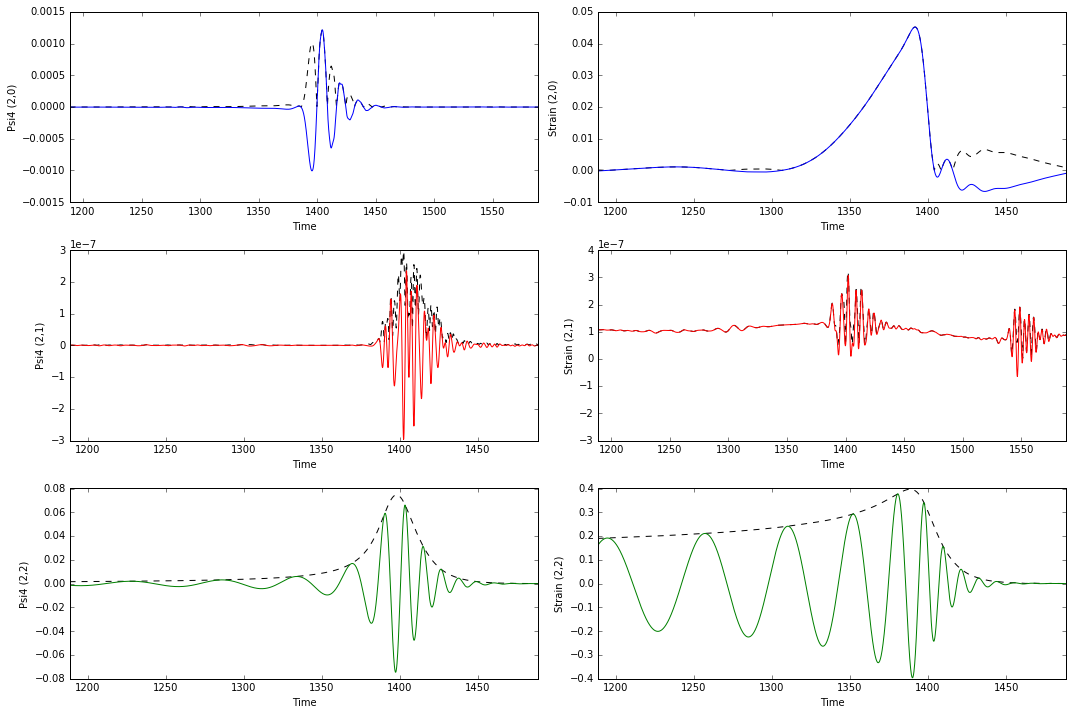

In [9]:
strain_psi4_compare(y)

# Frequency Plots
Below are the frequency plots of cleaned waveforms. As can be seen there is lot of junk part at high frequencies. How should I clean this?

/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value 

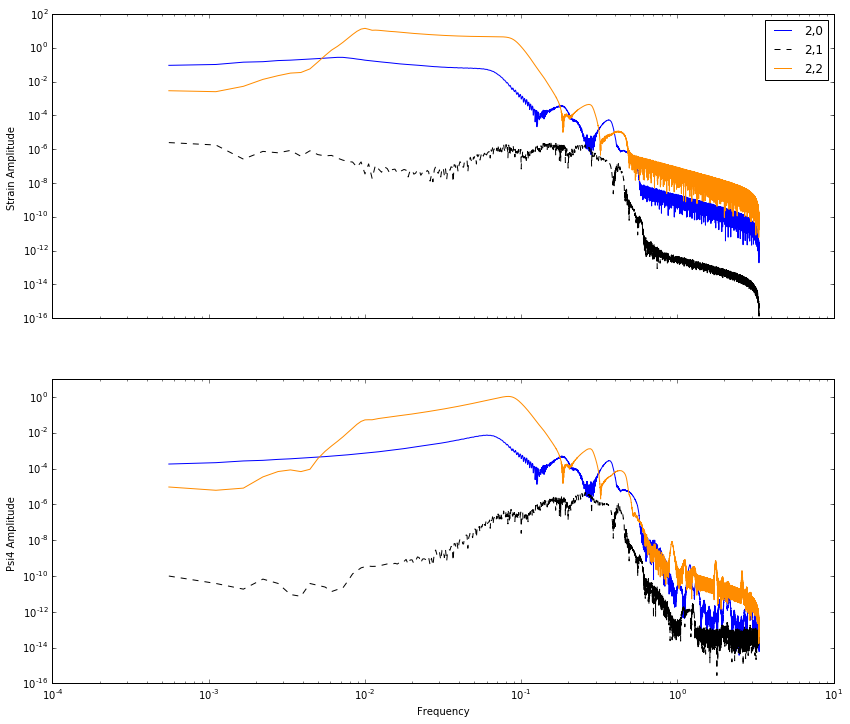

In [10]:
freq_21 = y.lm[2,1]['strain'].f
amp_21 =  y.lm[2,1]['strain'].fd_amp


freq_20 = y.lm[2,0]['strain'].f
amp_20 =  y.lm[2,0]['strain'].fd_amp

freq_22 = y.lm[2,2]['strain'].f
amp_22 =  y.lm[2,2]['strain'].fd_amp

psifreq_21 = y.lm[2,1]['psi4'].f
psiamp_21 =  y.lm[2,1]['psi4'].fd_amp

psifreq_20 = y.lm[2,0]['psi4'].f
psiamp_20 =  y.lm[2,0]['psi4'].fd_amp

psifreq_22 = y.lm[2,2]['psi4'].f
psiamp_22 =  y.lm[2,2]['psi4'].fd_amp

figure, (ax1, ax2) = plt.subplots(2,1,figsize=(14, 12), sharex=True)
ax1.loglog(freq_20, 2*np.sqrt(freq_20)*amp_20, color='blue', label="2,0")
ax1.loglog(freq_21, 2*np.sqrt(freq_21)*amp_21, color='black', ls='--', label="2,1")
ax1.loglog(freq_22, 2*np.sqrt(freq_22)*amp_22, color='darkorange',  label="2,2")

ax2.loglog(psifreq_20, 2*np.sqrt(psifreq_20)*psiamp_20, color='blue', label="2,0")
ax2.loglog(psifreq_21, 2*np.sqrt(psifreq_21)*psiamp_21, color='black', ls='--', label="2,1")
ax2.loglog(psifreq_22, 2*np.sqrt(psifreq_22)*psiamp_22, color='darkorange',  label="2,2")

ax2.set_xlabel('Frequency')
ax1.set_ylabel('Strain Amplitude ')
ax2.set_ylabel('Psi4 Amplitude ')

ax1.legend()
plt.show()
plt.close()

# Ringdown Part of Waveform

Below are the plots of ringdown part of the waveform for 2,0 and 2,1 mode. As can be seen in time domain plot, there is rise of amplitude after dropping from zero for 2,0 mode which does higher than 2,1 which is unphysical. See Psi4 plot for comparison. 

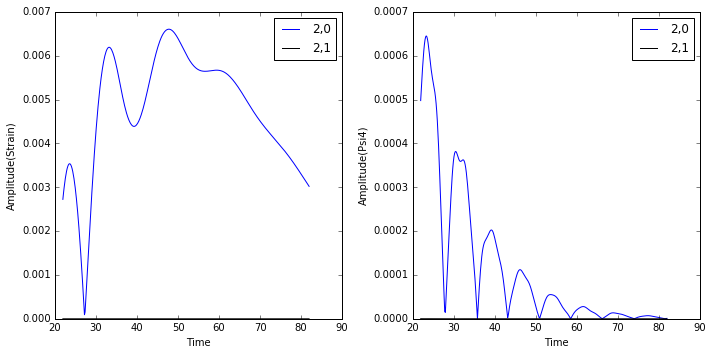

/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:62: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:64: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:65: RuntimeWarning: invalid value encountered in sqrt
/localdata/bkhamesra3/softwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:66: RuntimeWarning: invalid value encountered in sqrt


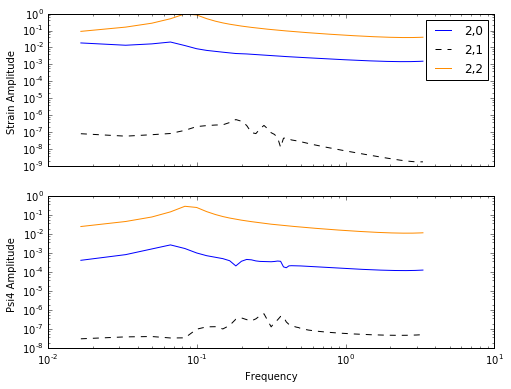

In [11]:
y_rd = y.ringdown()

time_20, hp_20, hx_20 = y_rd.lm[2,0]['strain'].wfarr.T
time_21, hp_21, hx_21 = y_rd.lm[2,1]['strain'].wfarr.T
time_22, hp_22, hx_22 = y_rd.lm[2,2]['strain'].wfarr.T

amp_20 = np.sqrt(hp_20**2. + hx_20**2)
amp_21 = np.sqrt(hp_21**2. + hx_21**2)
amp_22 = np.sqrt(hp_22**2. + hx_22**2)

psitime_20, re_20, im_20 = y_rd.lm[2,0]['psi4'].wfarr.T
psitime_21, re_21, im_21 = y_rd.lm[2,1]['psi4'].wfarr.T
psitime_22, re_22, im_22 = y_rd.lm[2,2]['psi4'].wfarr.T

psiamp_20 = np.sqrt(re_20**2. + im_20**2)
psiamp_21 = np.sqrt(re_21**2. + im_21**2)
psiamp_22 = np.sqrt(re_22**2. + im_22**2)

plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(time_20, amp_20, color='b', label='2,0')
plt.plot(time_21, amp_21, color='k', label='2,1')
#plt.plot(time_22, amp_22, color='darkorange', label='2,2')
plt.xlabel('Time')
plt.ylabel('Amplitude(Strain)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(psitime_20, psiamp_20, color='b', label='2,0')
plt.plot(psitime_21, psiamp_21, color='k', label='2,1')
#plt.plot(psitime_22, psiamp_22, color='darkorange', label='2,2')
plt.xlabel('Time')
plt.ylabel('Amplitude(Psi4)')

plt.legend()
plt.tight_layout()
plt.show()
plt.close()


freq_21 = y_rd.lm[2,1]['strain'].f
amp_21 =  y_rd.lm[2,1]['strain'].fd_amp

freq_20 = y_rd.lm[2,0]['strain'].f
amp_20 =  y_rd.lm[2,0]['strain'].fd_amp

freq_22 = y_rd.lm[2,2]['strain'].f
amp_22 =  y_rd.lm[2,2]['strain'].fd_amp

psifreq_21 = y_rd.lm[2,1]['psi4'].f
psiamp_21 =  y_rd.lm[2,1]['psi4'].fd_amp

psifreq_20 = y_rd.lm[2,0]['psi4'].f
psiamp_20 =  y_rd.lm[2,0]['psi4'].fd_amp

psifreq_22 = y_rd.lm[2,2]['psi4'].f
psiamp_22 =  y_rd.lm[2,2]['psi4'].fd_amp

figure, (ax1, ax2) = plt.subplots(2,1,figsize=(8, 6), sharex=True)
ax1.loglog(freq_20, 2*np.sqrt(freq_20)*amp_20, color='blue', label="2,0")
ax1.loglog(freq_21, 2*np.sqrt(freq_21)*amp_21, color='black', ls='--', label="2,1")
ax1.loglog(freq_22, 2*np.sqrt(freq_22)*amp_22, color='darkorange',  label="2,2")

ax2.loglog(psifreq_20, 2*np.sqrt(psifreq_20)*psiamp_20, color='blue', label="2,0")
ax2.loglog(psifreq_21, 2*np.sqrt(psifreq_21)*psiamp_21, color='black', ls='--', label="2,1")
ax2.loglog(psifreq_22, 2*np.sqrt(psifreq_22)*psiamp_22, color='darkorange',  label="2,2")

ax2.set_xlabel('Frequency')
ax1.set_ylabel('Strain Amplitude ')
ax2.set_ylabel('Psi4 Amplitude ')
ax1.legend()
plt.show()
plt.close()

# SXS Waveform  Comparison - Equal Mass NonSpinning (q=1, a=0)

In [12]:
os.chdir('/localdata/bkhamesra3/LIGO_Waveforms/Waveform_Comparison/Mode_20/')

In [14]:
ts_20, hps_20, hxs_20 = np.loadtxt('SXS/Strain/SXS_BBH_0001_Res5_20.txt', usecols=(0,1,2), unpack=True)
ts_21, hps_21, hxs_21 = np.loadtxt('SXS/Strain/SXS_BBH_0001_Res5_21.txt', usecols=(0,1,2), unpack=True)
ts_22, hps_22, hxs_22 = np.loadtxt('SXS/Strain/SXS_BBH_0001_Res5_22.txt', usecols=(0,1,2), unpack=True)

amps_20 = np.sqrt(hps_20**2. + hxs_20**2)
amps_21 = np.sqrt(hps_21**2. + hxs_21**2)
amps_22 = np.sqrt(hps_22**2. + hxs_22**2)



(validate!)>> Multiple catalog directories found. We will scan through the related list, and then store first the catalog_dir that the OS can find.
(validate!)>> Selecting "/nethome/numrel/datafiles/Waveforms/"
/nethome/numrel/datafiles/Waveforms/HR-series/q1/D11_q1.00_a0.0_m200/
(load)>> Imposing a default padding of 3 to the data.
(load)>> Imposing a default padding of 3 to the data.
(load)>> Imposing a default padding of 3 to the data.


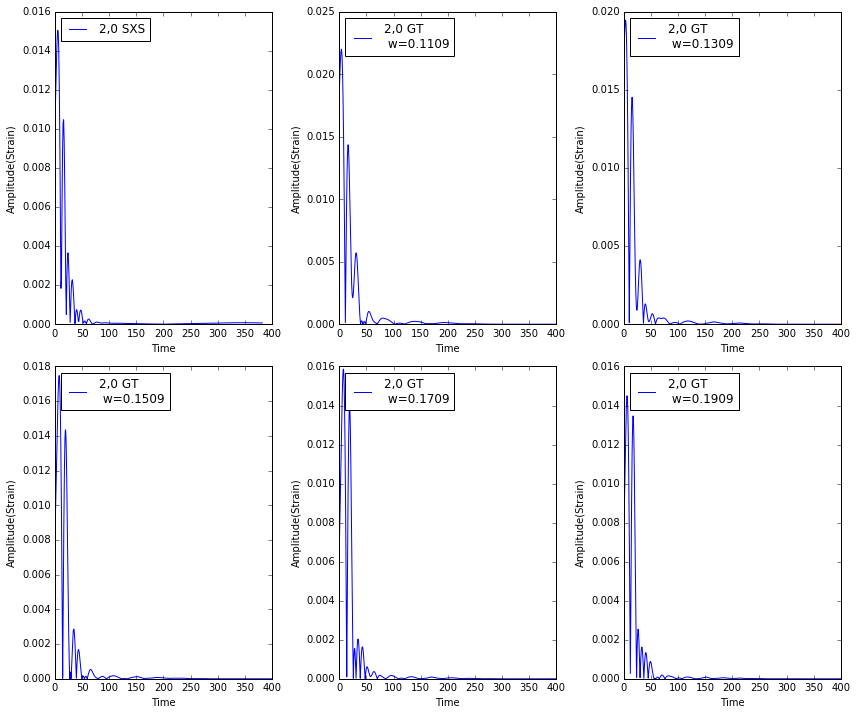

In [24]:
y_win = gwylm(sim, lm, clean=True)

plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,3,1)
plt.plot(ts_20, amps_20, color='b', label='2,0 SXS')
#plt.plot(ts_21, amps_21, color='k', label='2,1 SXS')
#plt.plot(ts_22, amps_22, color='darkorange', label='2,2 SXS')
plt.xlabel('Time')
plt.ylabel('Amplitude(Strain)')
plt.xlim(0, 400)
plt.legend(loc ='upper left')

for i in range(2,7):
 
    blockPrint(); 
    y = gwylm(sim, lm=lm, clean=True, w22=(y_win.wstart + 2.*(i+1)/100.));
    enablePrint();
    w = y_win.wstart+2.*(i+1)/100.

    time_20, hp_20, hx_20 = y.lm[2,0]['strain'].wfarr.T
    time_21, hp_21, hx_21 = y.lm[2,1]['strain'].wfarr.T
    time_22, hp_22, hx_22 = y.lm[2,2]['strain'].wfarr.T

    amp_20 = np.sqrt(hp_20**2. + hx_20**2)
    amp_21 = np.sqrt(hp_21**2. + hx_21**2)
    amp_22 = np.sqrt(hp_22**2. + hx_22**2)

    tmax = time_22[amp_22==np.amax(amp_22)]
    plt.subplot(2,3,i)
    plt.plot(time_20-tmax, amp_20, color='b', label='2,0 GT \n w=%.4f'%w)
    #plt.plot(time_21-tmax, amp_21, color='k', label='2,1 GT')
    #plt.plot(time_22-tmax, amp_22, color='darkorange', label='2,2 GT' )
    plt.xlabel('Time')
    plt.ylabel('Amplitude(Strain)')
    plt.xlim(0, 400)
    plt.legend(loc='upper left')
    
plt.tight_layout()    
plt.show()
plt.close()

In [ ]:
y_win.wstart

In [ ]:
hp_freq = y.lm[2,1]['strain'].fd_plus
freq = y.lm[2,1]['strain'].f
plt.plot(freq, hp_freq)
plt.xlim(0,0.5)
plt.show()

# SXS Psi4 

In [ ]:
import h5py

In [ ]:
def amp(re,im):
    return np.sqrt(re**2. + im**2.)

In [ ]:
sxs_ns = 'SXS/SXS_001_a0_q1/rPsi4_FiniteRadii_CodeUnits.h5'
sxs_as1 = 'SXS/SXS_012_q1.5_a1z-0.5/rMPsi4_Asymptotic_GeometricUnits.h5'
sxs_ns_hm = 'SXS/SXS_030_q3_a0/rMPsi4_Asymptotic_GeometricUnits_CoM.h5'
sxs_as2 = 'SXS/SXS_0318_q1.22_a1z0.33_a2z-0.44/rMPsi4_Asymptotic_GeometricUnits.h5'
sxs_prec = 'SXS/SXS_147_q1_a1x0.5_a2x-0.5/rMPsi4_Asymptotic_GeometricUnits.h5'

wf_ns_sxs = h5py.File(sxs_ns)['R0100.dir']
wf_hm_sxs = h5py.File(sxs_ns_hm)['Extrapolated_N3.dir']
wf_as1_sxs = h5py.File(sxs_as1)['Extrapolated_N3.dir']
wf_as2_sxs = h5py.File(sxs_as2)['Extrapolated_N3.dir']
wf_pr_sxs = h5py.File(sxs_prec)['Extrapolated_N3.dir']

In [ ]:
def plot_psi4(wf_sxs):
    
    data_22 = wf_sxs['Y_l2_m2.dat']
    data_21 = wf_sxs['Y_l2_m1.dat']
    data_20 = wf_sxs['Y_l2_m0.dat']

    t22, re22, im22 = np.transpose(data_22)
    t21, re21, im21 = np.transpose(data_21)
    t20, re20, im20 = np.transpose(data_20)
    
    tmax = t22[amp(re22,im22)==np.amax(amp(re22,im22))]

    plt.figure(figsize=(10,8))
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax1.plot(t22, amp(re22, im22),'k--', lw=2)
    ax1.plot(t22, re22, 'k')
    
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax2.plot(t20, amp(re21, im21),'r--', lw=2)
    ax2.plot(t20, re21,'r')
    
    ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
    ax3.plot(t20, amp(re20, im20),'b--', lw=2)
    ax3.plot(t20, re20, 'b')
    #ax3.plot(t20, im20, 'g')
    
    ax1.set_ylabel('Psi4 (2,2)')
    ax2.set_ylabel('Psi4 (2,1)')
    ax3.set_ylabel('Psi4 (2,0)')
    
    ax1.set_xlabel('Time')
    ax2.set_xlabel('Time')
    ax3.set_xlabel('Time')
    
    ax1.set_xlim(tmax-200, tmax+100)
    ax2.set_xlim(tmax-200, tmax+100)
    ax3.set_xlim(tmax-200, tmax+100)
    plt.tight_layout()
    plt.show()
    plt.close()


In [ ]:
plot_psi4(wf_ns_sxs)

In [26]:
y.__dict__

{'L1': array([ 0.        , -0.        ,  0.49554503]),
 'L2': array([ 0.        ,  0.        ,  0.49554503]),
 'P1': array([-0.00071204,  0.0900991 ,  0.        ]),
 'P2': array([ 0.00071204, -0.0900991 ,  0.        ]),
 'R1': array([ 5.5,  0. ,  0. ]),
 'R2': array([-5.5,  0. ,  0. ]),
 'S1': array([0, 0, 0]),
 'S2': array([0, 0, 0]),
 'Sf': array([ -1.48358241e-09,   3.67262124e-09,   6.21373841e-01]),
 'X1': array([ 0.,  0.,  0.]),
 'X2': array([ 0.,  0.,  0.]),
 'Xf': array([ -1.63847235e-09,   4.05605266e-09,   6.86246921e-01]),
 '__input_lmlist__': [(2, 0), (2, 1), (2, 2)],
 '__isclean__': True,
 '__isringdownonly__': False,
 '__lmlist__': [(2, 0), (2, 1), (2, 2)],
 '__lowpassfiltered__': False,
 '__scentry__': <nrutils.core.nrsc.scentry instance at 0x7fe2aae4a998>,
 'b': 11.0,
 'config': <nrutils.core.nrsc.scconfig instance at 0x7fe2aa57a710>,
 'date_number': 1451576293.0,
 'default_extraction_par': 75.0,
 'default_level': None,
 'dt': 0.15,
 'endindex': 11291,
 'enforce_polariz